<a href="https://colab.research.google.com/github/dealtron/Regression_PieSales/blob/master/Regression_PieSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

## **Simple Linear Regression**

Pertama-tama kita import dulu libraries yang diperlukan untuk regression linear ini.

In [30]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

Setelah itu kita read dataset kita, pie-sales.csv yang telah disiapkan dan kemudian diimport menjadi df_pie

In [31]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/dealtron/Regression_PieSales/master/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


Disini kita bisa melihat ada 4 atribut, yaitu :
1.   week,
2.   pie_sales,
3.   price,
4.   advertising.

Lalu kita lihat korelasi dari setiap atribut di dalam dataset yang akan kita pakai.

In [32]:
corr = df_pie.corr().apply(np.abs)
corr.style.background_gradient(cmap='GnBu')

,week,pie_sales,price,advertising
week,1.000000,0.067887,0.227662,0.039217
pie_sales,0.067887,1.000000,0.443273,0.556320
price,0.227662,0.443273,1.000000,0.030438
advertising,0.039217,0.556320,0.030438,1.000000


Disini korelasi di atas, kita dapat berhipotesis bahwa banyaknya pie sales dipengaruhi oleh nilai price dan juga nilai advertising.

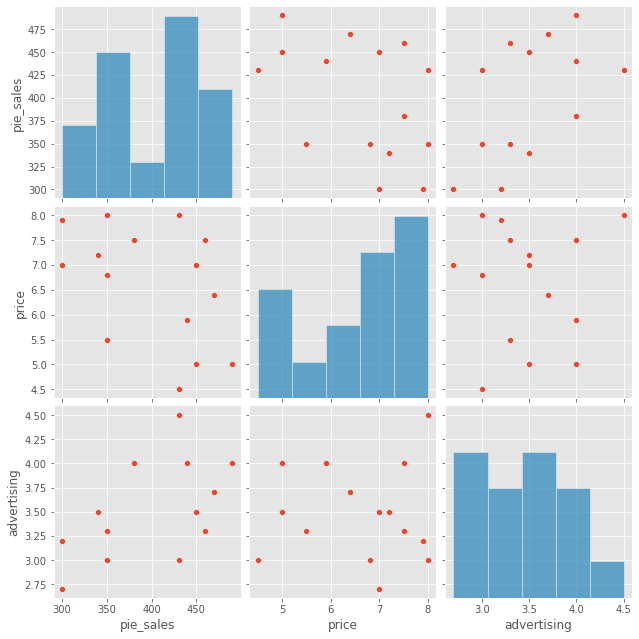

In [33]:
sns.pairplot(df_pie.drop('week',axis=1), diag_kind="hist",size=3)

Dan dari plot di atas juga kita bisa dapat berhipotesis bahwa :
1.   Independent Variables di model ini yaitu atribut : price dan advertising (X)
2.   Dependent Variables di model ini yaitu atribut : pie_sales (Y)

Lalu kemudian kita gunakan regression linear.

In [34]:
X = df_pie[['advertising','price']]
x1 = df_pie[['advertising']]
x2 = df_pie[['price']]
Y = df_pie['pie_sales']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Dan kemudian kita lihat nilai intercept dan nilai coefficient dari model yang akan kita pakai.

In [35]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

coefs = regr.coef_
intercept = regr.intercept_
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],coefs[1]))

Intercept: 
 306.52619328374374
Coefficients: 
 [ 74.13095749 -24.97508952]
Equation: y = 306.53 + 74.13x1 + -24.98x2


Disini kita dapat melihat bahwa regression equation dari model kita adalah :

pie_sales = 306.53 + 74.13(x1=advertising) + -24.98(x2=price)

Dari equation di atas juga kita bisa bilang bahwa pie sales dapat ditingkatkan dengan melakukan advertising yang lebih dan/atau pengurangan price dari pie tersebut

Lalu kemudian mari kita visualisasikan model tersebut menjadi 3D plot.

In [36]:
x3d, y3d = np.meshgrid(np.linspace(df_pie.advertising.min(), df_pie.advertising.max()),np.linspace(df_pie.price.min(), df_pie.price.max()))
XX = pd.DataFrame({'advertising': x3d.ravel(), 'price': y3d.ravel()})
YY=regr.predict(XX)
YY=np.array(YY)

Equation: y = 306.53 + 74.13x1 + -24.98x2


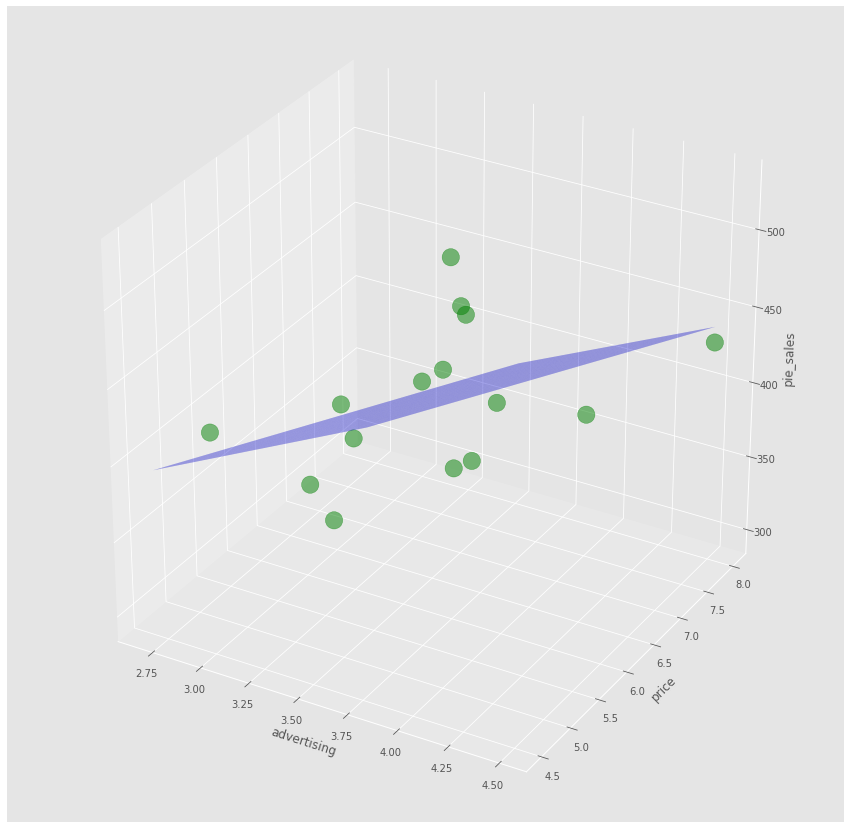

In [37]:
# Visualize the data using scatterplot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_pie['advertising'], df_pie['price'],df_pie['pie_sales'], c='g',alpha=0.5, s=300)
ax.plot_surface(x3d,y3d,YY.reshape(x3d.shape), color='b', alpha=0.4)


ax.set_xlabel('advertising')
ax.set_ylabel('price')
ax.set_zlabel('pie_sales')

coefs = regr.coef_
intercept = regr.intercept_
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],coefs[1]))
plt.show()


### **Regression using Sklearn**

Disini kita akan melakukan plotting terpisah untuk model pie_sales dan advertising, dan juga model pie_sales dan price.

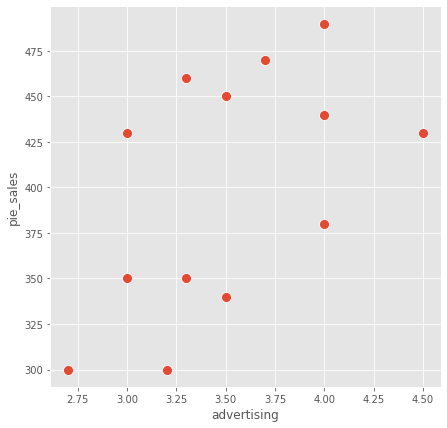

In [39]:
sns.scatterplot(x="advertising", y="pie_sales", data=df_pie,s=100)
plt.xlabel("advertising")
plt.ylabel("pie_sales")
plt.show()

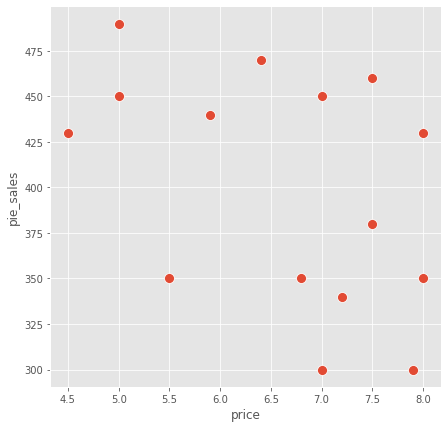

In [40]:
sns.scatterplot(x="price", y="pie_sales", data=df_pie,s=100)
plt.xlabel("price")
plt.ylabel("pie_sales")
plt.show()

Dan kemudian kita coba untuk melihat linear regression dari dependent variables dengan masing-masing independent variables-nya.

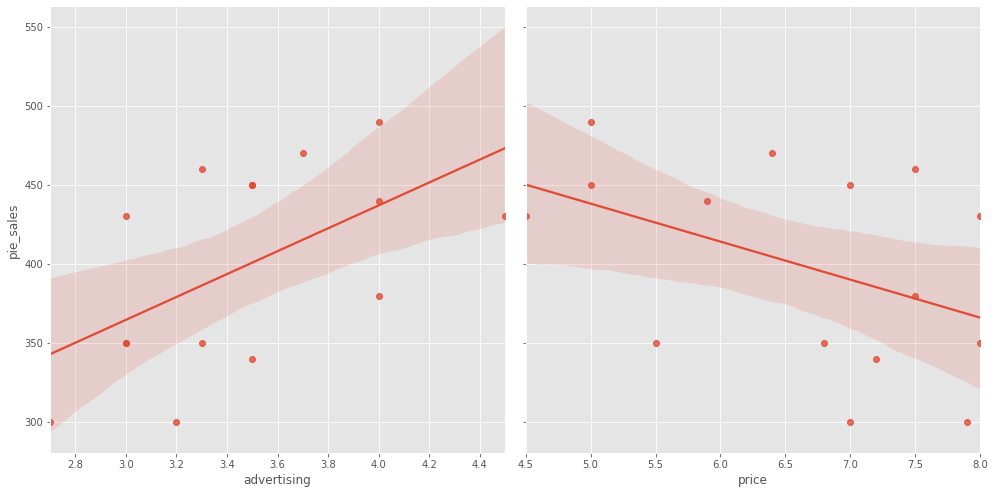

In [42]:
regress = sns.PairGrid(df_pie, y_vars=["pie_sales"], x_vars=["advertising","price"],height=7)
print(regress.map(sns.regplot))

Dari regression plot ini kita bisa menyimpulkan juga bahwa :
1.   Semakin tinggi advertising, semakin tinggi juga pie sales yang didapatkan,
2.   Semakin rendah price, semakin tinggi juga pie sales yang didapatkan.



Dan dengan menggunakan model dan equation yang ada, kita dapat memprediksi jumlah pie_sales dengan menginput nilai advertising dan price yang baru. Disini saya menggunakan nilai :

advertising : 4.5

price       : 4.5

In [43]:
# prediction with sklearn
new_advertising = float(input('Advertising ='))
new_price = float(input('Price = '))
print ('Predicted pie sales in a week: \n', regr.predict([[new_advertising,new_price]]))

Advertising =4.5
Price = 4.5
Predicted pie sales in a week: 
 [527.72759915]


Dan hasil prediksi pie_sales yang saya dapatkan adalah 527 pie.

In [44]:
regpred = regr.predict(X)
print(regpred)

[413.79536065 363.84518161 329.11834961 440.31478584 359.08845703
 415.73685186 416.53116292 420.97016308 391.15891787 478.17457565
 386.16389997 346.44205006 455.69699508 441.10909691 331.85415188]


### **Regression using Statsmodels**

Disini saya akan memasukkan nilai 

1.   MAE (Mean Absolute Error),
2.   MSE (Mean Squared Error),
3.   RMSE (Root Mean Squared Error).


In [45]:
print('MAE:',metrics.mean_absolute_error(Y,regpred))  
print('MSE:',metrics.mean_squared_error(Y,regpred))  
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y,regpred)))

MAE: 34.54567364769344
MSE: 1802.2204311503626
RMSE: 42.45256683818262


RMSE sendiri merupakan standard deviation atau akar dari MSE. RMSE dengan nilai 42.45 menunjukkan skala besaran prediksi dengan nilai asli yang ada pada dataset.

Kemudian kita gunakan OLS Regression Results untuk melihat summary dari model kita

In [46]:
X = sm.add_constant(X) # adding a constant

In [47]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        12:57:28   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

Disini kita bisa melihat dan menganalisis data pada bagian 
1. R-squared (0 < r2 < 1), disini kita mendapatkan nilai 0.521 atau 52.1%. Ini artinya model yang kita pakai dapat memprediksi sekitar 52.1% berdasarkan X yang ada (advertising, pricing), sedangkan 47.9%-nya dipengaruhi oleh atribut yang tidak ada di dataset,

2. Durbin-Watson (n=15, alpha=0.05, dL = 0.95, dU = 1.54), nilai pada bagian Durbin-Watson adalah 1.683. Disini D > dU > dL, yang mengartikan tidak adanya corelation pada data dan model

3. F-Test (F-stat > 3.81, disini kita mendapatkan F-Table dari k = 2 dan n-k= 13), pada bagian F-statistic, nilainya adalah 6.539. Karena Nilai F-Stat lebih dari 3.81, maka bisa dibilang bahwa model kita signifikan dan bisa digunakan untuk prediksi,

4. T-Test (T > T-Table, -T < -T-Table, menggunakan 0.05/2=0.025 karena two tail, n-k=13, T-Table = 2.16 atau -2.16), pada bagian nilai t pada tiap independent variables, kita bisa melihat bahwa nilai t pada advertising = 2.855, artinya lebih besar dari T-Table plus, dan juga nilai t pada price = -2.306, artinya lebih kecil dari T-Table minus. Dapat disimpulkan bahwa tiap independent variable mempunyai pengaruh yang signifikan terhadap model yang ada.

